# 0. Imports

## 0.1 Libs

In [53]:
import pandas   as pd
import numpy    as np
import seaborn  as sns

from IPython.display  import Image
from matplotlib       import pyplot as plt


## 0.2 Helper Functions

## 0.3 Loading data

In [54]:
df_raw = pd.read_csv('../data/kc_house_data.csv')

# 1. Data Description

## 1.0 Overview

In [55]:
df1 = df_raw.copy()
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

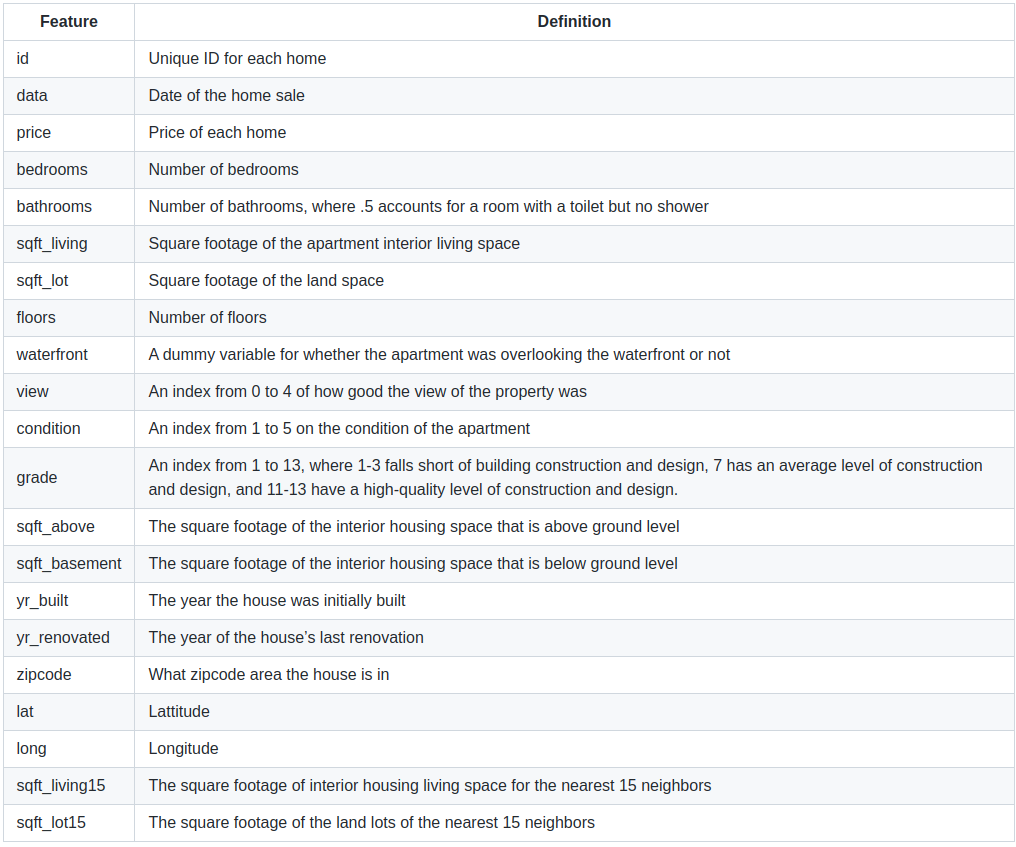

In [56]:
Image('../image/feature_definition.png')

## 1.1 Dimensão dos dados

In [57]:
print(f'Number of Rows:{df1.shape[0]}')
print(f'Number of Columns:{df1.shape[1]}')

Number of Rows:21613
Number of Columns:21


## 1.2 Data Types

In [58]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.2.1 Change Types

In [59]:
df1['date'] = pd.to_datetime(df1['date'])
df1['floors'] = df1['floors'].astype(int)

In [60]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3 Check and Fillout NA

In [61]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Data Descriptive

### 1.4.1 Defining Datasets

In [62]:
num_attributes = df1[['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

cat_attributes = df1[['view', 'condition', 'waterfront',  'grade']]

### 1.4.2 Numerical Attributes

In [63]:
# Medidas de Tendência Central (média e mediana)
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Medidas de Dispersão (std, min, max, range, skew, kurtosis)
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenar
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

pd.set_option('float_format', '{:.2f}'.format)
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
2,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
3,floors,1.00,3.00,2.00,1.45,1.00,0.55,0.73,-0.55
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,sqft_above,290.00,9410.00,9120.00,1788.40,NaN,828.11,1.45,3.40
7,sqft_basement,0.00,4820.00,4820.00,291.51,0.00,442.56,1.58,2.72
8,yr_built,1900.00,2015.00,115.00,1971.01,1975.00,29.37,-0.47,-0.66
9,yr_renovated,0.00,2015.00,2015.00,84.40,0.00,401.67,4.55,18.70


### 1.4.2 Categorical Attributes

<AxesSubplot:xlabel='waterfront', ylabel='price'>

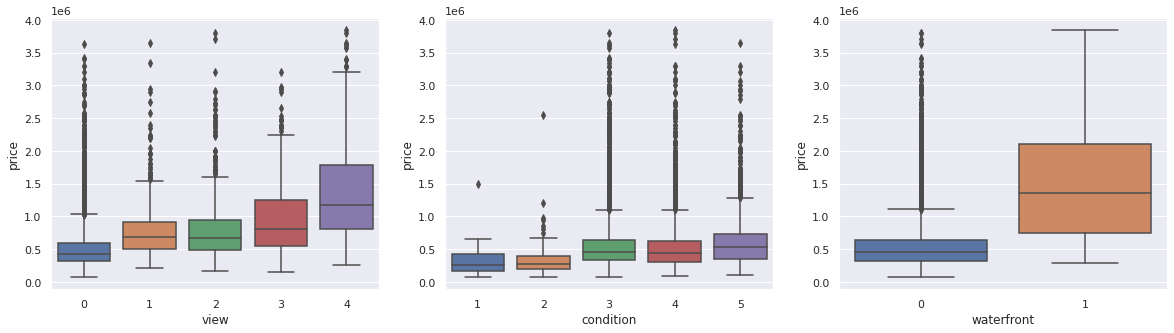

In [64]:
aux1 = df1[(df1['price'] < 4000000 )]

sns.set(rc={'figure.figsize':(20,5)})

plt.subplot(1,3,1)
sns.boxplot(x='view', y='price', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='condition', y='price', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='waterfront', y='price', data=aux1)

<AxesSubplot:xlabel='grade', ylabel='price'>

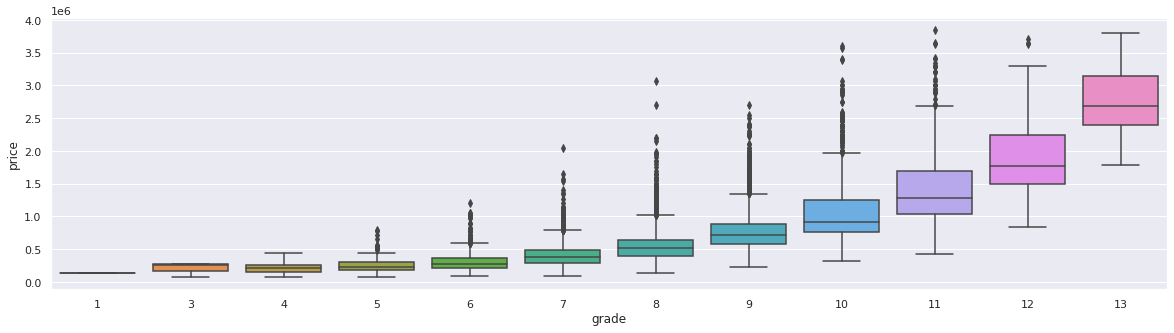

In [65]:
sns.boxplot(x='grade', y='price', data=aux1)

# 2. Feature Engineering

## 2.1 Mind Map

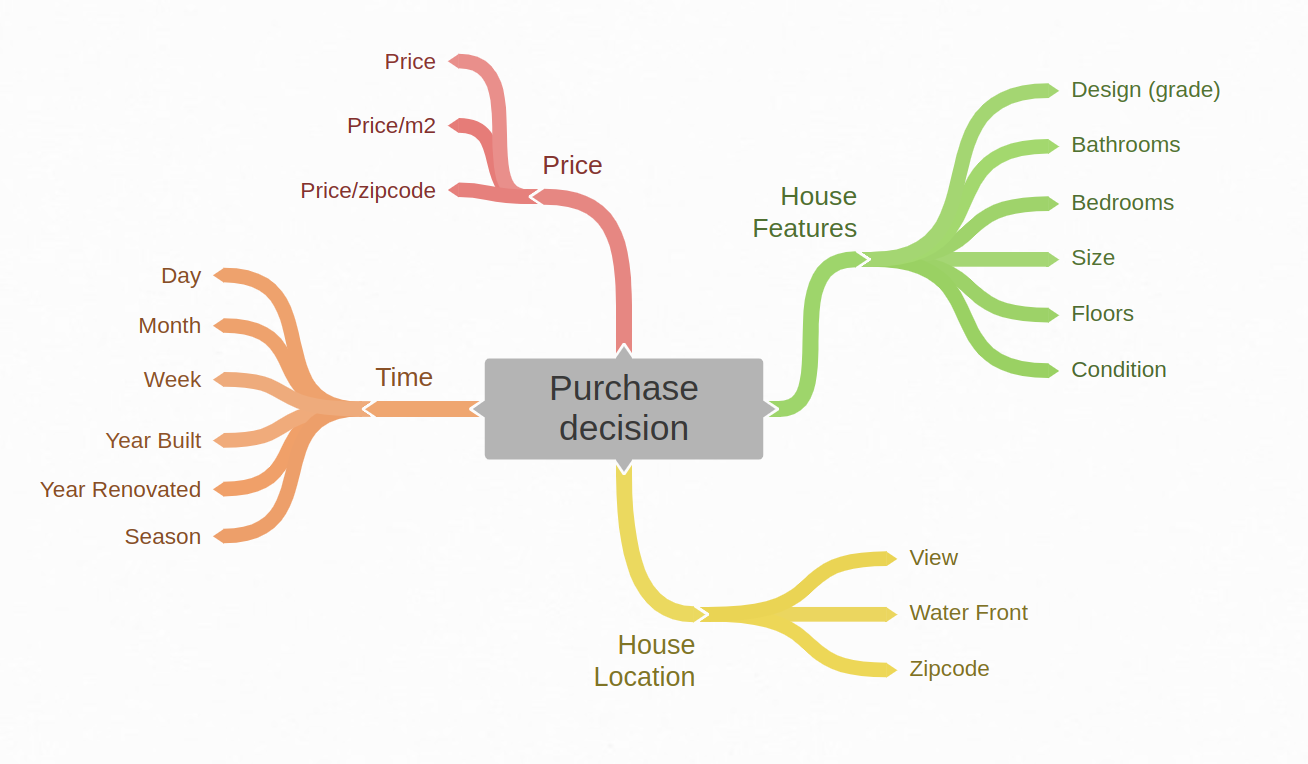

In [66]:
Image('../image/mind_map.png')

## 2.2 Hypotheses Definition

* H1: o crescimento do preço dos imóveis de 2014 para 2015 foi de 10%.
* H2: imóveis que possuem vista para água são 20% mais caros na média.
* H3: os imoveis com vista para a agua possuem uma área 50% maior que os demais.
* H4: imóveis sem porão possuem área total 40% maior que os imoveis com porão.
* H5: imóveis com 3 banheiros tiveram um crescimento de 15% ao mês (MoM)
* H6: imóveis que foram reformados e estão em boas condições são, em média, 20% mais caros que os não reformados nas mesmas condições.
* H7: imóveis em más condições são 20% mais baratos que imoveis em boas condições.
* H8: imóveis construídos depois dos anos 2000 possuem área total 20% menor que os demais.
* H9: imoveis construídos depois dos anos 2000 são 30% mais caros que os demais
* H10: imóveis construídos antes 1955 são 50% mais baratos na média.
* H11: a melhor época para vender é no verão.
* H12: Imóveis com design modernos (grade > 10) são 50% mais caros que os demais.



## 2.3 Feature Engineering

In [118]:
df2 = df1.copy()

In [119]:
# Time-derived features

# Month:
df2['month'] = df2['date'].dt.month

# Year: 
df2['year'] = df2['date'].dt.year

# Season:
for i in range(len(df2)):
  if (df2.loc[i, 'month'] <= 2 ) or (df2.loc[i, 'month'] == 12):
      df2.loc[i, 'season'] = 'inverno'
  elif df2.loc[i, 'month'] <= 5:
      df2.loc[i, 'season'] = 'primavera'
  elif df2.loc[i, 'month'] <= 8:
      df2.loc[i, 'season'] = 'verao'
  else:
      df2.loc[i, 'season'] = 'outono'


In [120]:
# Area features in square meters

# sqft2 para m2:
df2['m2_lot']      = df2['sqft_lot'] / 10.764
df2['m2_living']   = df2['sqft_living'] / 10.764
df2['m2_above']    = df2['sqft_above'] / 10.764
df2['m2_basement'] = df2['sqft_basement'] / 10.764

# Preço/m2:
df2['price_m2'] = df2['price'] / df2['m2_lot']

# Median Price/m2 by region:
df_temp1 = df2[['zipcode', 'price_m2']].groupby('zipcode').median().reset_index()
df_temp1 = df_temp1.rename(columns={'price_m2': 'median_price_m2_zipcode'})
df2 = pd.merge( df2, df_temp1, on='zipcode', how='inner')

In [121]:
# Features derived from clusters

# Por tipo de imóvel:
df2['dormitory_type'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'bedrooms'] <= 1:
      df2.loc[i, 'dormitory_type'] = 'studio'  
    elif df2.loc[i, 'bedrooms'] <= 2:
      df2.loc[i, 'dormitory_type'] = 'apartment'
    elif df2.loc[i, 'bedrooms'] <= 4:
      df2.loc[i, 'dormitory_type'] = 'house'
    else:
      df2.loc[i, 'dormitory_type'] = 'mansion'

# Por price/m2:
df2['price_group'] = 'NA'
for i in range( len( df2 ) ):
    # price/m2 está acima da mediana da região
    if df2.loc[i, 'price_m2'] > df2.loc[i, 'median_price_m2_zipcode']:
      df2.loc[i, 'price_group'] = 'acima da mediana'  
    # price/m2 está entre 75% e 100% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.75:
      df2.loc[i, 'price_group'] = 'quartil_4'
    # price/m2 está entre 50% e 75% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.5:
      df2.loc[i, 'price_group'] = 'quartil_3' 
    # price/m2 está entre 25% e 50% da mediana da região
    elif df2.loc[i, 'price_m2'] >= df2.loc[i, 'median_price_m2_zipcode']*0.25:
      df2.loc[i, 'price_group'] = 'quartil_2'
    # price/m2 está entre 0% e 25% da mediana da região
    else:
      df2.loc[i, 'price_group'] = 'quartil_1'

# Por ano de contrução:
df2['house_age'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'yr_built'] > 1990:
      df2.loc[i, 'house_age'] = 'new_house'
    elif df2.loc[i, 'yr_built'] > 1960:
      df2.loc[i, 'house_age'] = 'old_house'
    else:
      df2.loc[i, 'house_age'] = 'very_old_house'

# By Design Quality:
df2['design'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'grade'] < 7:
      df2.loc[i, 'design'] = 0  
    elif df2.loc[i, 'grade'] == 7:
      df2.loc[i, 'design'] = 1
    elif df2.loc[i, 'grade'] < 10:
      df2.loc[i, 'design'] = 2
    else:
      df2.loc[i, 'design'] = 3


In [122]:
# Features of rooms not listed

# Toilet (bathroom without shower):
df2['toilet'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'bathrooms'] % 0.5 == 0:
      df2.loc[i, 'toilet'] = 0
    else:
      df2.loc[i, 'toilet'] = 1
    
# Basement:
df2['basement'] = 'NA'
for i in range( len( df2 ) ):
    if df2.loc[i, 'sqft_basement'] > 0:
      df2.loc[i, 'basement'] = 1
    else:
      df2.loc[i, 'basement'] = 0

In [123]:
# Better Season to Sell - feature with the best selling period by zipcode:
    # Obs.: calculei a mediana por zipcode e por estação do ano e selecionei a estação que tinha a maior mediana
df_temp2 = df2[['zipcode', 'season', 'price_m2']].groupby(['zipcode', 'season']).median().reset_index()

for i in range(len(df_temp2)):
  df_temp2.loc[i, 'concat'] = str(df_temp2.loc[i, 'zipcode']) + '_' + str(df_temp2.loc[i, 'price_m2'])

better_season = df_temp2[['zipcode', 'price_m2']].groupby('zipcode').max().reset_index()

for i in range(len(better_season)):
  better_season.loc[i, 'concat'] = str(better_season.loc[i, 'zipcode']) + '_' + str(better_season.loc[i, 'price_m2'])

better_season = pd.merge( better_season, df_temp2[['concat', 'season']], on='concat', how='inner')
better_season.columns = ['zipcode', 'max_median_price_m2_zipcode', 'concat', 'better_season_to_sell']
df2 = pd.merge (df2, better_season[['zipcode', 'better_season_to_sell', 'max_median_price_m2_zipcode']], on='zipcode', how='inner')


# 3. Filtro de Variáveis

## 3.1 Filtragem de linhas

In [135]:
df3 = df2.copy()

In [136]:
# Retirando imóvel com 33 quartos (registro incorreto)
df3 = df3[df3['bedrooms'] < 33]

# Retirando imóveis sem banheiro completo:
df3 = df3[df3['bathrooms'] < 1]

# Retirando casas acima de 4 milhões de dolares
df3 = df3[df3['price'] > 4000000]

## 3.2 Filtragem de colunas

In [127]:
# As colunas sqft_living15', 'sqft_lot15' não serão utilizadas nessa rodada de analise
# As colunas de área em sqft serão excluídas


cols_drop = ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'max_median_price_m2_zipcode']
df3 = df3.drop(cols_drop, axis=1)

In [128]:
df3.sample(5).T

,19019,13541,21576,21568,13651
id,1247600105,8907500070,9208900037,2470100110,3835500195
date,2014-10-20 00:00:00,2015-04-13 00:00:00,2014-09-19 00:00:00,2014-08-04 00:00:00,2014-06-18 00:00:00
price,5110800.00,5350000.00,6885000.00,5570000.00,4489000.00
bedrooms,5,5,6,5,4
bathrooms,5.25,5.00,7.75,5.75,3.00
floors,2,2,2,2,2
waterfront,1,0,0,0,0
view,4,4,4,0,0
condition,3,3,3,3,3
grade,12,12,13,13,12


# 4. Análise Exploratória de dados

## 4.1 Análise Univariada

In [77]:
df4 = df3.copy()

In [78]:
# Definindo datasets:
num_attributes = df4.select_dtypes(include=['int64', 'float64'])
cat_attributes = df4.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])


### 4.1.1 Variáveis Numéricas

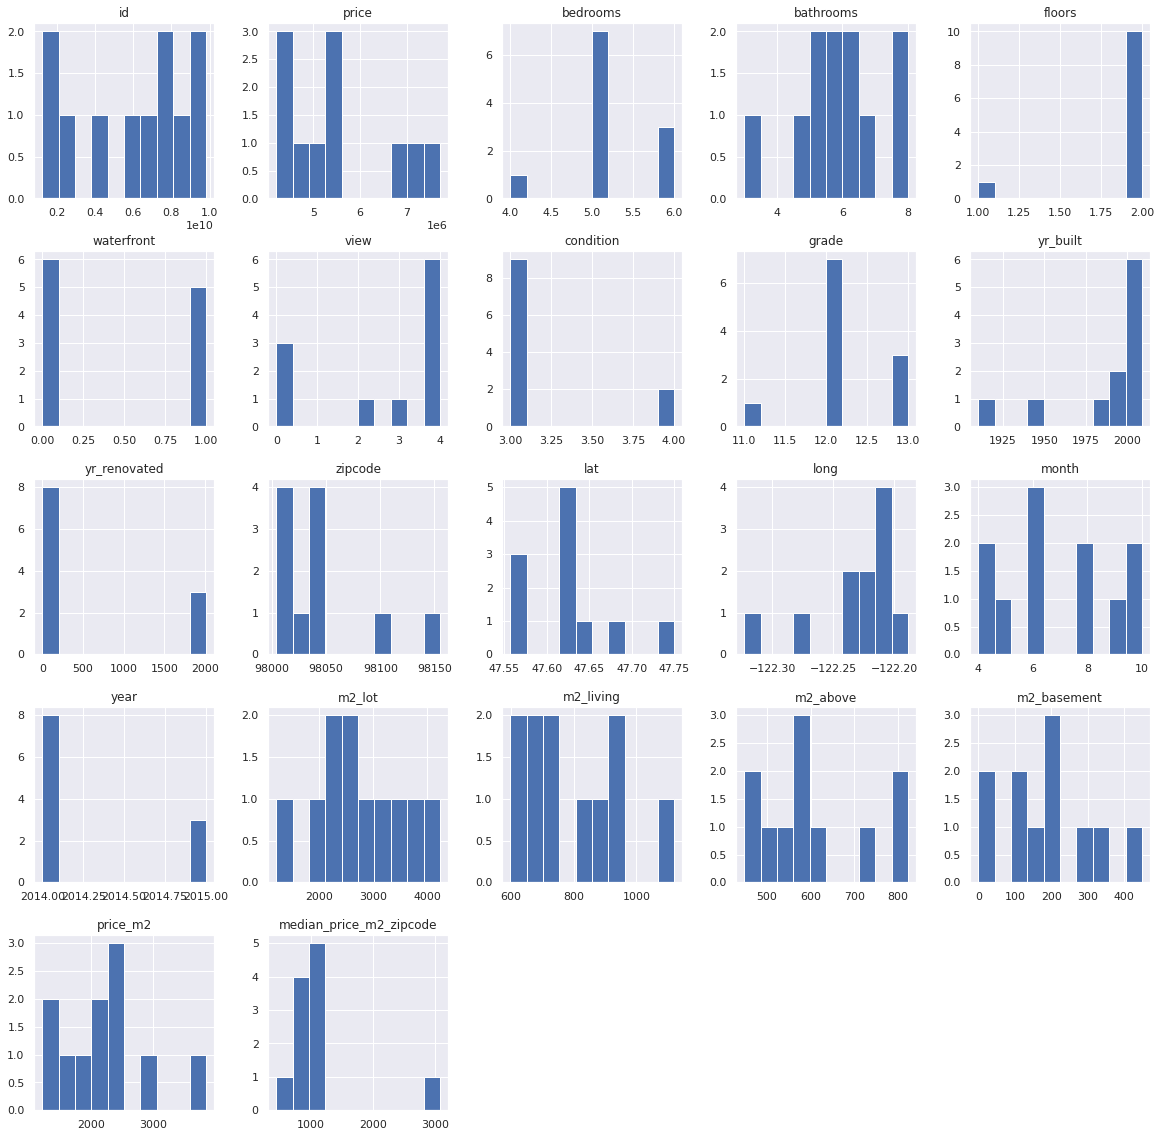

In [79]:
# Análise do portfólio total:
sns.set(rc={'figure.figsize':(20,20)})
num_attributes.hist();


### 4.1.2 Variáveis Categóricas

In [80]:
cat_attributes.sample(5).T

,13651,13584,6350,13541,16547
season,verao,verao,primavera,primavera,outono
dormitory_type,house,mansion,mansion,mansion,mansion
price_group,acima da mediana,acima da mediana,acima da mediana,acima da mediana,quartil_1
house_age,new_house,very_old_house,old_house,new_house,very_old_house
toilet,0,0,0,0,0
basement,0,1,1,1,1
better_season_to_sell,inverno,inverno,primavera,inverno,inverno


/home/vitor/.pyenv/versions/3.9.0/envs/HouseRocket/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


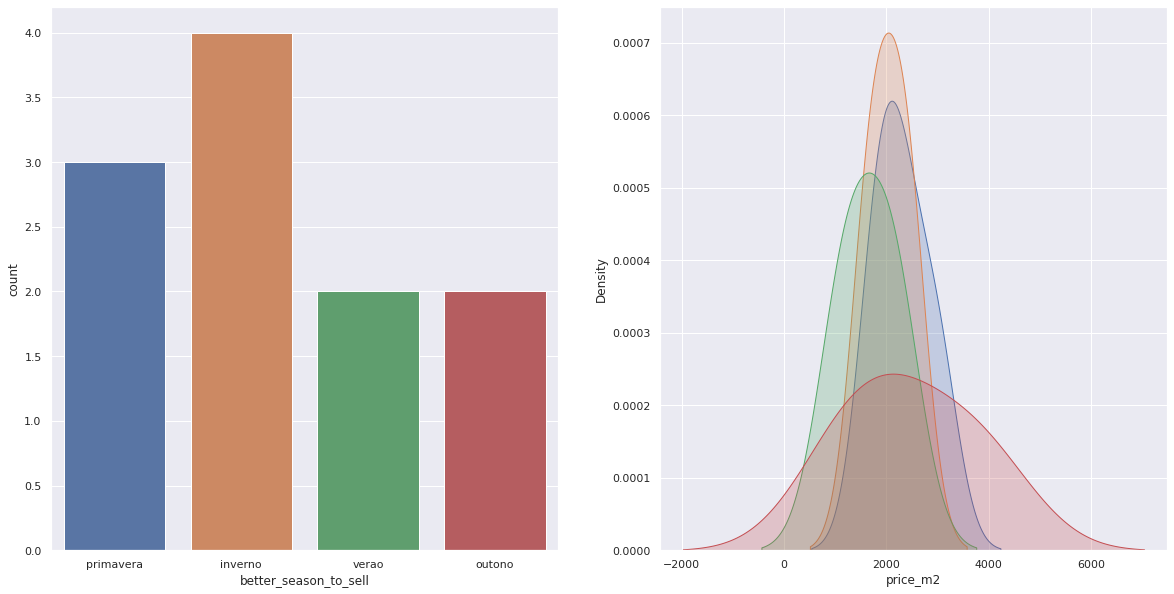

In [81]:
# Melhor estação para venda

sns.set(rc={'figure.figsize':(20,10)})
plt.subplot(1, 2, 1)
sns.countplot(cat_attributes['better_season_to_sell']);

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['better_season_to_sell'] == 'inverno']['price_m2'], label ='inverno', shade=True);
sns.kdeplot(df4[df4['better_season_to_sell'] == 'outono']['price_m2'], label ='outono', shade=True);
sns.kdeplot(df4[df4['better_season_to_sell'] == 'verao']['price_m2'], label ='verao', shade=True);
sns.kdeplot(df4[df4['better_season_to_sell'] == 'primavera']['price_m2'], label ='primavera', shade=True);

/home/vitor/.pyenv/versions/3.9.0/envs/HouseRocket/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vitor/.pyenv/versions/3.9.0/envs/HouseRocket/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price_m2', ylabel='Density'>

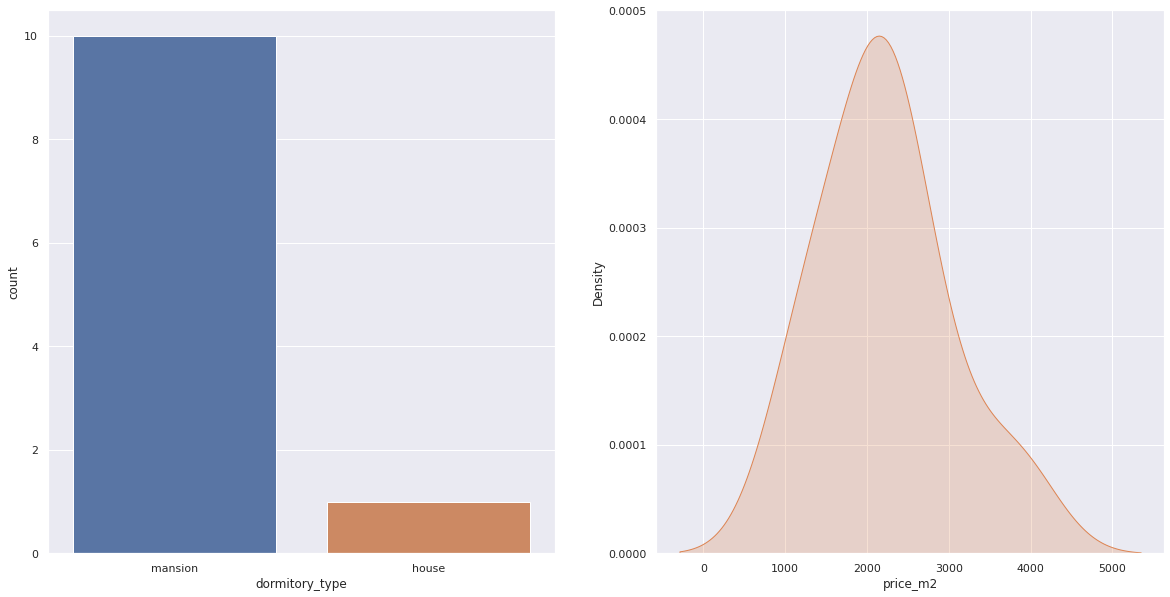

In [82]:
# Tipos de imóveis

plt.subplot(1, 2, 1)
sns.countplot(cat_attributes['dormitory_type']);

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['dormitory_type'] == 'apartament']['price_m2'], label ='apartament', shade=True)
sns.kdeplot(df4[df4['dormitory_type'] == 'house']['price_m2'], label ='house', shade=True)
sns.kdeplot(df4[df4['dormitory_type'] == 'mansion']['price_m2'], label ='mansion'     , shade=True)
sns.kdeplot(df4[df4['dormitory_type'] == 'studio']['price_m2'], label ='primavera'     , shade=True)

/home/vitor/.pyenv/versions/3.9.0/envs/HouseRocket/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


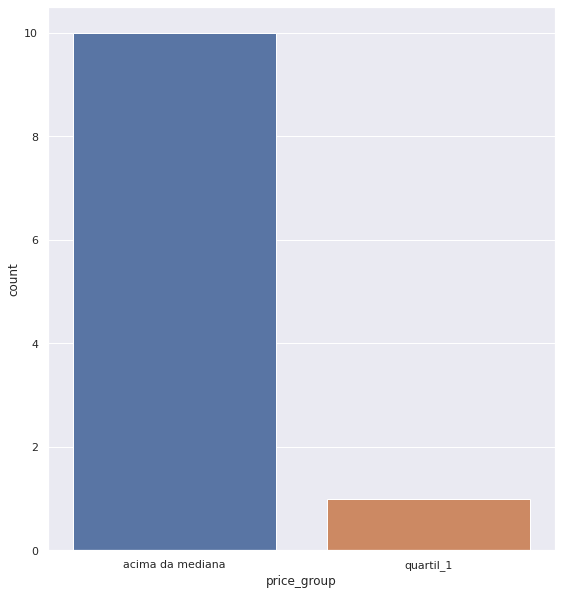

In [83]:
# Classificação pelo price/m2

plt.subplot(1, 2, 1)
sns.countplot(cat_attributes['price_group']);

# plt.subplot(1, 2, 2)
# sns.kdeplot(df4[df4['price_group'] == 'apartament']['price_m2'], label ='apartament', shade=True)
# sns.kdeplot(df4[df4['price_group'] == 'house']['price_m2'], label ='house', shade=True)
# sns.kdeplot(df4[df4['price_group'] == 'mansion']['price_m2'], label ='mansion'     , shade=True)
# sns.kdeplot(df4[df4['price_group'] == 'studio']['price_m2'], label ='primavera'     , shade=True)

In [84]:
df4[df4['condition']>=4][['price_group', 'house_age', 'dormitory_type', 'price']].groupby(['price_group', 'house_age', 'dormitory_type']).count().reset_index()

,price_group,house_age,dormitory_type,price
0,acima da mediana,old_house,mansion,1
1,quartil_1,very_old_house,mansion,1


In [85]:
df4['house_age'].value_counts()

new_house         6
old_house         3
very_old_house    2
Name: house_age, dtype: int64

## 4.2 Análise Bivariada

st.header('Hipóteses de Negócio')
    st.write('Abaixo são apresentadas análises complementares dos dados, validando hipóteses que possam gerar ações e auxiliar no direcionamento da tomada de decisão da empresa.')

    #1:
    st.write('#### Hipótese 1: o crescimento do preço dos imóveis de 2014 para 2015 foi de 10%.')
    #st.subheader('Hipótese 1: o crescimento do preço dos imóveis de 2014 para 2015 foi de 10%.')
    price_yr = data[['price', 'year']].groupby('year').mean().reset_index()
    yoy = price_yr.loc[1, 'price'] / price_yr.loc[0, 'price'] -1
    st.write(f'R: o crescimento médio dos preços no período foi de {yoy:.1%}.')

    #2:
    st.write('#### Hipótese 2: imóveis que possuem vista para água são 20% mais caros na média.')
    price_wf = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
    price_wf = price_wf.loc[1, 'price'] / price_wf.loc[0, 'price'] -1
    st.write(f'R: imóveis com vista para a água são {price_wf:.1%} mais caros que os demais.')

    #3:
    st.write('#### Hipótese 3: a área dos imoveis com vista para a agua, em média, é 50% maior que os demais.')
    wf_1 = data[data['waterfront'] == 1]['sqft_lot'].mean()
    wf_0 = data[data['waterfront'] == 0]['sqft_lot'].mean()
    rate_wf = wf_1 / wf_0 -1
    st.write(f'R: os imóveis que possuem vista para a água são, em média, {rate_wf:.1%} maiores que os demais.')

    #4:
    st.write('#### Hipótese 4: imóveis sem porão possuem área total 40% maior que os imoveis com porão.')
    without_basement = data[(data['sqft_basement'] == 0)]['sqft_lot'].mean()
    with_basement = data[(data['sqft_basement'] > 0)] ['sqft_lot'].mean()
    rate_basement = without_basement / with_basement -1
    st.write(f'R: Imóveis sem porão possuem uma área em média {rate_basement:.1%} maior que os imóveis com porão.')

    #5: Hipótese sem ação (colocar MoM na primeira questão faz mais sentido do que YoY)
    st.write('#### Hipótese 5: imóveis com 3 banheiros tiveram um crescimento de 15% ao mês (MoM)')
    bathroom3 = data[(data['bathrooms'] == 3)][['price', 'year', 'month']]
    bathroom3 = bathroom3[['price', 'year', 'month']].groupby(['year', 'month']).mean().reset_index()
    bathroom3['diff'] = bathroom3['price'].diff()
    bathroom3['MoM'] = bathroom3['price'].pct_change()
    bathroom3

    #6:
    st.write('#### Hipótese 6: imóveis que foram reformados e estão em boas condições são, em média, 20% mais caros que os não reformados nas mesmas condições.')
    condition3_4 = data[(data['condition'] == 3) | (data['condition'] == 4)] [['price', 'yr_renovated', 'condition']]
    not_renovated = condition3_4[(condition3_4['yr_renovated'] == 0)].mean()
    renovated = condition3_4[(condition3_4['yr_renovated'] != 0)].mean()
    ratio3_4 = renovated['price'] / not_renovated['price'] -1
    st.write(f'R: Os imóveis reformados são em média {ratio3_4:.1%} mais caros que imóveis nas mesmas condições que não foram reformados.')

    #7:
    st.write('#### Hipótese 7: imóveis em más condições são 20% mais baratos que imoveis em boas condições.')
    condition = data[['price', 'condition']].groupby('condition').mean().reset_index()
    mean_bad = condition[(condition['condition'] <=2)]['price'].mean()
    mean_good = condition[(condition['condition'] > 2 ) & (condition['condition'] < 5)]['price'].mean()
    mean_great = condition[(condition['condition'] == 5)]['price'].mean()
    ratio_bad_good = 1- mean_bad / mean_good 
    ratio_bad_great = 1- mean_bad / mean_great
    st.write(f'R: Imóveis em más condições são em média {ratio_bad_good:.1%} mais baratos que imóveis em boas condições e são {ratio_bad_great:.1%} mais baratos que imóveis em ótimas condições.')

    #8:.\venve
    st.write('#### Hipótese 8: imóveis construídos depois dos anos 2000 possuem área total 20% menor que os demais.')
    mean_2000 = data[data['yr_built'] >= 2000] ['sqft_lot']. mean()
    mean_1900 = data[data['yr_built'] < 2000] ['sqft_lot']. mean()
    ratio_sqft2000 = 1- mean_2000 / mean_1900
    st.write(f'R: Imóveis construídos depois dos anos 2000 são em média {ratio_sqft2000:.1%} menores que os demais.')

    #9:
    st.write('#### Hipótese 9: imoveis construídos depois dos anos 2000 são 30% mais caros que os demais')
    price_1900 = data[data['yr_built'] < 2000] ['price']. mean()
    price_2000 = data[data['yr_built'] >= 2000] ['price']. mean()
    ratio_price2000 = price_2000 / price_1900 -1
    st.write(f'R: Imóveis construídos depois dos anos 2000 são em média {ratio_price2000:.1%} mais caros que os demais.')

    #10:
    st.write('#### Hipótese 10: imóveis com data de construção menor que 1955 são 50% mais baratos na média.')
    # Mediana de preço dos imoveis construidos depois de 1955
    over_55 = data[(data['yr_built'] > 1955)]['price'].mean()
    under_55 = data[(data['yr_built'] <= 1955)]['price'].mean()
    ratio_price55 = 1- under_55 / over_55
    st.write(f'R: Imóveis construídos antes de 1955 são em média {ratio_price55:.1%} mais baratos.')

## 4.3 Análise Multivariada

# 5. Resposta ao CEO

* Quais imóveis comprar?
* Quando vender?
* Por quanto vender?

In [86]:
# # Sugestão de compra:
#     # Obs.: Nesse ciclo vou trabalhar com a sugestão de compra de imóveis com preço 40% abaixo da mediana e condição maior ou igual a 4
#     # Para o cenário apresentado essa conclusão deveria ser definida depois da EDA.
    
# for i in range(len(df2)):
#   if (df2.loc[i, 'price_m2'] < (df2.loc[i, 'median_price_m2_zipcode']* 0.6)) & (df2.loc[i, 'condition'] >= 4):
#     df2.loc[i, 'status'] = 'buy'
#   else:
#     df2.loc [i, 'status'] = 'not_buy'

# # Sugestão do preço de venda:
#     # Obs.: Nesse ciclo vou trabalhar com a sugestão do preço de revenda de 40% acima do preço de compra. 

# for i in range(len(df2)):
#   df2.loc[i, 'sale_price'] = df2.loc[i, 'price'] * 1.4